### Importação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregamento do dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(9994, 11)

In [4]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Regiao',
       'ID_Produto', 'Categoria', 'Nome_Produto', 'Valor_Venda', 'Quantidade'],
      dtype='object')

In [5]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

## Tratamento de dados

In [6]:
moda = df['Quantidade'].value_counts().index[0]

In [7]:
moda

3.0

In [8]:
df['Quantidade'].fillna(value= moda, inplace = True)

C:\Users\diego\AppData\Local\Temp\ipykernel_7996\1979845995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantidade'].fillna(value= moda, inplace = True)


In [9]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

In [10]:
df.Valor_Venda.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,TB-21400,Consumer,United States,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.2480,3.0
9990,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,FUR-FU-10000747,Furniture,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0
9991,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,TEC-PH-10003645,Technology,Aastra 57i VoIP phone,258.5760,2.0
9992,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,OFF-PA-10004041,Office Supplies,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0


In [12]:
X = np.array(df['Quantidade'])

In [13]:
X = X.reshape(-1, 1) # nunca usar id

In [14]:
y = df['Valor_Venda']

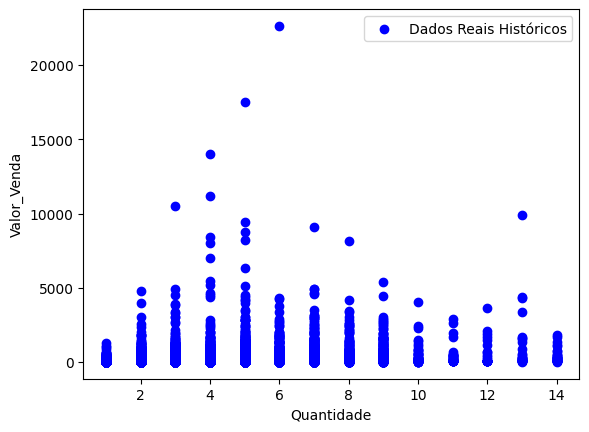

In [15]:
plt.scatter(X,y, color='blue', label="Dados Reais Históricos")
plt.xlabel("Quantidade")
plt.ylabel("Valor_Venda")
plt.legend()
plt.show()

In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state= 42)

In [17]:
y_teste.shape

(1999,)

In [18]:
modelo = LinearRegression()

In [19]:
modelo.fit(X_treino, y_treino)

LinearRegression()

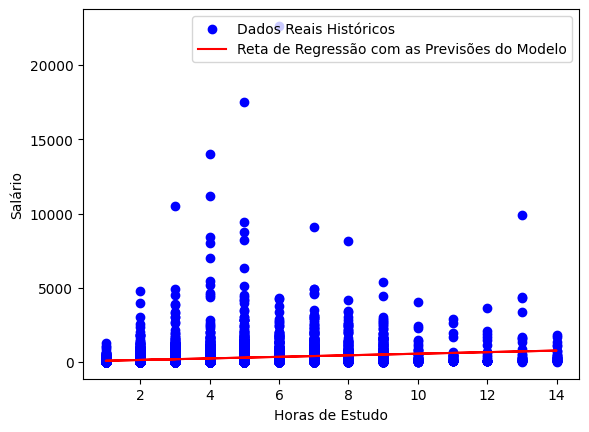

In [20]:
plt.scatter(X, y, color= "blue", label="Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label="Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [21]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.04


In [22]:
modelo.intercept_

26.926933267192908

In [23]:
modelo.coef_

array([52.69827231])

In [24]:
quantidade = np.array([[1]])

salario_previsto = modelo.predict(quantidade)

print(f"Se você estudar cerca de {quantidade} horas por mês seu salário pode ser igual a {salario_previsto}")

Se você estudar cerca de [[1]] horas por mês seu salário pode ser igual a [79.62520558]
